In [4]:
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [5]:
dfAll = pd.read_csv('./../out/Allevent.txt',encoding='utf-16',index_col=0)
eventLabel=pd.DataFrame()
eventLabel['eventidx']=dfAll.index
eventLabel['pos']=dfAll['valence'].map(lambda x: 1 if x >0 else 0)
eventLabel['high']=dfAll['arousal'].map(lambda x: 1 if x >1 else 0)
eventLabel.set_index('eventidx',inplace=True)

def threepart(x):
    if x<-1:
        return 0
    elif x>-2 and x<2:
        return 2
    else:
        return 1
eventLabel['pos_h']=dfAll['valence'].map(threepart)
eventLabel['high_h']=dfAll['arousal'].map(threepart)
eventLabel['emotions']=dfAll['emotions']
eventLabel['event']=dfAll['event']

phyEventdf20=pd.read_csv('./../out/feature/phyEvent20s.csv',encoding='utf-16',index_col='eventidx')
featureTrans20=phyEventdf20.groupby('sujet').transform(lambda x: (x - x.mean()) / x.std())
phyEventNormdf20=pd.concat([phyEventdf20['sujet'], featureTrans20], axis=1)
phyEventNormdf20n=phyEventNormdf20.dropna(axis=1,how='any')
phydf=phyEventNormdf20n
y_ar=eventLabel.iloc[18:,1]

fea_rank=pd.read_csv('./../out/fearank.csv',encoding='utf-8')

X=phydf.join(y_ar,how='inner')
X.head()

,sujet,ECG_raw_mean,ECG_raw_median,ECG_raw_max,ECG_raw_min,ECG_raw_vrange,ECG_raw_var,ECG_raw_stddev,ECG_raw_avgder,ECG_raw_maxgra,...,Resp_Ampup_mean,Resp_Ampup_max,Resp_Ampup_min,Resp_Ampup_vrange,Resp_Ampup_avgder,Resp_Ampup_maxgra,Resp_Ampup_absdev,Resp_Ampup_kurtosis,Resp_Ampup_skewness,high
eventidx,,,,,,,,,,,,,,,,,,,,,
18,2,-0.676255,0.017119,-1.789465,0.489156,-1.369097,-1.972292,-1.992517,0.646479,-2.047862,...,-0.449223,-0.754732,-0.103999,-0.938180,-0.123218,-0.731820,-0.953438,2.560772,-2.520112,1
19,2,-0.094325,-0.983920,-2.077616,0.630765,-1.632249,-1.873250,-1.886956,-0.115413,-2.066838,...,-0.608117,-0.718555,-0.559278,-0.644232,-0.127995,-0.624444,-0.706549,0.614415,-0.995620,1
20,2,0.071147,-0.768972,-2.216446,0.570811,-1.671956,-1.680142,-1.682600,-0.228325,-2.206339,...,-0.284586,-0.264912,-0.205224,-0.238035,0.792475,-0.389146,-0.023452,-0.962222,0.307639,1
21,2,0.076285,-0.311708,-2.147545,0.644436,-1.682052,-2.011211,-2.034140,-0.085891,-2.030301,...,-0.940244,-1.060074,-0.638381,-1.051429,-0.266165,-0.874688,-0.940169,-0.781403,-0.804197,0
22,2,-0.085260,-0.732947,-1.974493,0.588749,-1.543958,-2.266504,-2.309191,0.191727,-1.783428,...,-0.949861,-1.049494,-0.581031,-1.068513,-0.392518,-0.851201,-1.000337,0.059458,0.631071,1


In [6]:
fea_rank=pd.read_csv('./../out/fearank.csv',encoding='utf-8',header=None,index_col=0,names=['feature','fre'])
fea_rank.head()

,fre
feature,
sfEMG_raw_avgder,20
sfEMG_raw_mean,18
Resp_Ampup_kurtosis,16
fEMG_raw_maxgra,16
fEMG_raw_mean,16


In [7]:
X.groupby('sujet').get_group(6)

,sujet,ECG_raw_mean,ECG_raw_median,ECG_raw_max,ECG_raw_min,ECG_raw_vrange,ECG_raw_var,ECG_raw_stddev,ECG_raw_avgder,ECG_raw_maxgra,...,Resp_Ampup_mean,Resp_Ampup_max,Resp_Ampup_min,Resp_Ampup_vrange,Resp_Ampup_avgder,Resp_Ampup_maxgra,Resp_Ampup_absdev,Resp_Ampup_kurtosis,Resp_Ampup_skewness,high
eventidx,,,,,,,,,,,,,,,,,,,,,
186,6,0.048686,-0.761819,-1.385549,0.878750,-1.353580,-0.667655,-0.654372,0.992836,-0.655681,...,-0.137711,-0.554958,0.601292,-0.956595,-0.140181,-0.810583,-0.947020,-0.105367,0.309389,0
187,6,-0.083060,-0.890883,-1.586246,1.329613,-1.645811,-0.815980,-0.807157,-2.164646,-1.298154,...,-0.184911,-0.609211,0.304502,-0.841630,-0.620516,-0.830932,-0.937329,2.164709,-1.847495,1
188,6,-0.795177,-0.203731,-0.263789,0.169003,-0.258208,-1.721638,-1.764006,0.544004,-0.383357,...,0.029389,-0.394274,0.666327,-0.819832,-0.334229,-0.621226,-0.734750,-0.579029,-0.339058,0
189,6,-0.147244,-1.165603,0.390703,-0.008150,0.310468,-0.873533,-0.866726,-0.787321,-0.461546,...,-0.200761,-0.490198,0.131091,-0.610416,0.200766,-0.125619,-0.498816,-0.585824,-0.299001,0
190,6,-0.054739,0.820102,-1.641316,1.423091,-1.717011,-1.955737,-2.018472,1.084824,-1.326139,...,-0.252497,-0.216625,-0.412325,0.005974,0.220609,0.765050,0.104276,-0.278919,-0.059340,0
191,6,-0.069501,-2.581138,-0.925940,0.846472,-0.981613,0.393376,0.409359,-0.330911,-0.780253,...,0.041817,0.053482,0.158484,-0.034711,-0.267967,-0.266711,0.181755,-0.564515,0.390534,0
192,6,0.094402,1.426181,-0.709942,0.628791,-0.746618,-0.584841,-0.569523,-1.728956,-0.542658,...,-0.226227,-0.517030,0.311500,-0.745400,-0.045891,-0.277257,-0.691036,-0.868051,0.415796,0
193,6,-0.074792,0.534837,-0.117352,-0.268007,-0.012876,-0.062085,-0.041193,0.827555,-0.252314,...,-0.543192,-0.570874,-0.131401,-0.544321,0.585950,-0.517463,-0.367992,-0.023325,1.217208,1
194,6,-0.193619,0.710499,-0.368020,0.822798,-0.534691,-0.537194,-0.520851,0.210920,-0.464291,...,-0.716453,-0.629549,-1.609661,0.258559,0.486052,0.638078,0.366297,0.385810,-1.258949,0


In [54]:
from sklearn import tree
from sklearn.model_selection import train_test_split
nb_feabase=70
cmpsigfeature=pd.DataFrame()
Tree={}
for sujet, Xnn in X.groupby('sujet'): 
    print(sujet)
    y=Xnn.high
    Xn=Xnn.drop(['high','sujet'],axis=1)
    Xn=Xn.dropna(axis=1,how='any')
    if len(Xn)<20: 
        continue
    else:
        #classification rate without feature selection:
        svc = SVC(kernel="linear", C=1)
        Xn1=Xn[fea_rank.index[:nb_feabase]]
        score_o = cross_val_score(svc, Xn1, y, cv=5)
        # Create the RFE object and rank each pixel
        rfe = RFE(estimator=svc, n_features_to_select=20, step=5)
        rfe.fit(Xn1, y)
        selectf=Xn1.columns.values[rfe.get_support()]
        Xnn=Xn1[selectf]
        score_s = cross_val_score(svc, Xnn, y, cv=5)
        
        clf = tree.DecisionTreeClassifier()
        score_t = cross_val_score(clf, Xnn, y, cv=5)
        
        X_train, X_test, y_train, y_test = train_test_split(Xnn, y, test_size=0.4, random_state=0)
        clf.fit(X_train, y_train)
        score_t1=clf.score(X_test, y_test) 
        
        ncmp={}
        ncmp['nevent']=len(Xnn)
        ncmp['score_t_mean']=score_t.mean()
        ncmp['score_t_std']=score_t.std()
        ncmp['score_t1_mean']=score_t1.mean()
        ncmp['score_t1_std']=score_t1.std()
        ncmp['score_s_mean']=score_s.mean()
        ncmp['score_s_std']=score_s.std()
        ncmp=pd.DataFrame(ncmp,index=[sujet])
        cmpsigfeature=cmpsigfeature.append(ncmp)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


In [25]:
cmpsigfeature.head()

,nevent,score_s_mean,score_s_std,score_t1_mean,score_t1_std,score_t_mean,score_t_std
2,47,0.817778,0.171068,0.578947,0.0,0.518889,0.180999
3,46,0.911111,0.129577,0.789474,0.0,0.724444,0.181951
4,32,0.971429,0.057143,0.923077,0.0,0.823810,0.106053
5,43,0.905556,0.092296,0.500000,0.0,0.625000,0.137773
6,20,0.900000,0.122474,0.250000,0.0,0.760000,0.159374


In [15]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import pickle


nb_feabase=70
cmpsigfeature=pd.DataFrame()
Tree={}
for sujet, Xnn in X.groupby('sujet'): 
    print(sujet)
    y=Xnn.high
    Xn=Xnn.drop(['high','sujet'],axis=1)
    Xn=Xn.dropna(axis=1,how='any')
    if len(Xn)<20: 
        continue
    else:
        #classification rate without feature selection:
        svc = SVC(kernel="linear", C=1)
        Xn1=Xn[fea_rank.index[:nb_feabase]]
        score_o = cross_val_score(svc, Xn1, y, cv=5)
        # Create the RFE object and rank each pixel
        rfe = RFE(estimator=svc, n_features_to_select=20, step=5)
        rfe.fit(Xn1, y)
        selectf=Xn1.columns.values[rfe.get_support()]
        Xnn=Xn1[selectf]
        score_s = cross_val_score(svc, Xnn, y, cv=5)
        
        clf = tree.DecisionTreeClassifier()
        score_t = cross_val_score(clf, Xnn, y, cv=5)
        
        X_train, X_test, y_train, y_test = train_test_split(Xn1, y, test_size=0.4, random_state=0)
        clf.fit(X_train, y_train)
        clf.score(X_test, y_test) 
        
        Tree[sujet]=pickle.dumps(clf)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


In [16]:
import numpy as np

Res=np.zeros((45,45))
i=0
for sujet, Xnn in X.groupby('sujet'): 
    #print(sujet)
    y=Xnn.high
    Xn=Xnn.drop(['high','sujet'],axis=1)
    Xn=Xn.dropna(axis=1,how='any')
    Xn1=Xn[fea_rank.index[:nb_feabase]]
    if len(Xn)<20: 
        continue
    else:
        j=0
        for k,clf2 in Tree.iteritems():
            Res[i,j]=pickle.loads(clf2).score(Xn1,y)
            j=j+1
    i=i+1

In [17]:
Res

array([[ 0.85106383,  0.65957447,  0.63829787, ...,  0.55319149,
         0.46808511,  0.5106383 ],
       [ 0.56521739,  0.91304348,  0.86956522, ...,  0.58695652,
         0.30434783,  0.43478261],
       [ 0.46875   ,  0.5625    ,  0.90625   , ...,  0.65625   ,
         0.375     ,  0.4375    ],
       ..., 
       [ 0.69767442,  0.51162791,  0.65116279, ...,  0.76744186,
         0.44186047,  0.46511628],
       [ 0.45945946,  0.43243243,  0.35135135, ...,  0.48648649,
         0.89189189,  0.54054054],
       [ 0.53333333,  0.53333333,  0.43333333, ...,  0.5       ,
         0.53333333,  0.9       ]])

In [18]:
sujetls=[sujet for sujet, Xnn in X.groupby('sujet') if len(Xnn)>=20]
sujetls

[2,
 3,
 4,
 5,
 6,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 40,
 42,
 43,
 44,
 45,
 47,
 48,
 51,
 52,
 53,
 54,
 55,
 58]

In [19]:
TreeEnsembleDF=pd.DataFrame(data=Res, index=sujetls,columns=sujetls)

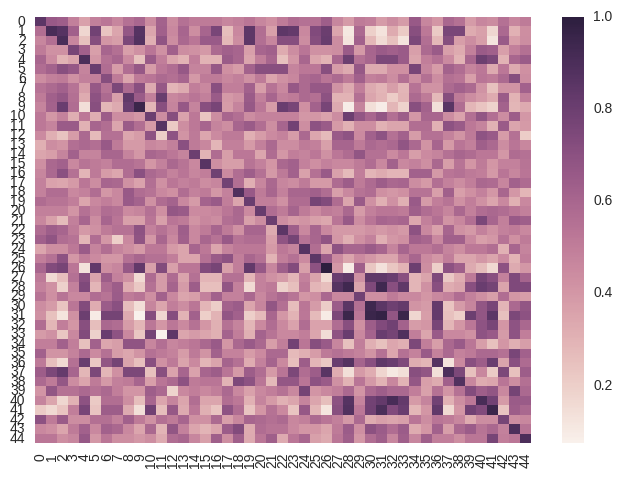

In [20]:
ax = sns.heatmap(Res)

In [24]:
np.sum(Res>0.7,axis=0)


array([ 1,  3,  7,  1,  9,  6,  3,  4,  4,  7,  5,  5,  3,  1,  1,  3,  5,
        1,  3,  4,  2,  2,  5,  8,  2,  5,  7,  5, 11,  1,  8, 10,  9,  8,
        7,  0,  8,  5,  3,  5,  6, 10,  2,  8,  2])

[(0.2823529411764706, 0.47058823529411764, 0.8117647058823529),
 (0.41568627450980394, 0.8, 0.396078431372549),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.7058823529411765, 0.48627450980392156, 0.7803921568627451),
 (0.7686274509803922, 0.6784313725490196, 0.4)]

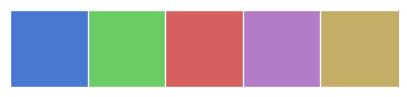

In [23]:
#lacolor= sns.color_palette("Blues_d",5)
sns.palplot(sns.color_palette("muted", n_colors=5))
lacolor= sns.color_palette("muted", n_colors=5)
lacolor

In [25]:
matinfo=pd.read_csv('./../out/matstaFeature.csv',encoding='utf-16')
sujetdf=matinfo.groupby('sujet', as_index=False)['niveausub'].first()
sujetdf=pd.DataFrame(sujetdf)
sujetdf.head()

,sujet,niveausub
0,1,1
1,2,4
2,3,2
3,4,3
4,5,5


In [26]:
sujetdf['color5']=sujetdf.apply(lambda row: lacolor[row.niveausub-1],axis=1)
sujetdf['color2']=sujetdf.apply(lambda row: lacolor[row.niveausub>2],axis=1)
sujetdf

,sujet,niveausub,color5,color2
0,1,1,"(0.282352941176, 0.470588235294, 0.811764705882)","(0.282352941176, 0.470588235294, 0.811764705882)"
1,2,4,"(0.705882352941, 0.486274509804, 0.780392156863)","(0.41568627451, 0.8, 0.396078431373)"
2,3,2,"(0.41568627451, 0.8, 0.396078431373)","(0.282352941176, 0.470588235294, 0.811764705882)"
3,4,3,"(0.839215686275, 0.372549019608, 0.372549019608)","(0.41568627451, 0.8, 0.396078431373)"
4,5,5,"(0.76862745098, 0.678431372549, 0.4)","(0.41568627451, 0.8, 0.396078431373)"
5,6,3,"(0.839215686275, 0.372549019608, 0.372549019608)","(0.41568627451, 0.8, 0.396078431373)"
6,7,5,"(0.76862745098, 0.678431372549, 0.4)","(0.41568627451, 0.8, 0.396078431373)"
7,8,2,"(0.41568627451, 0.8, 0.396078431373)","(0.282352941176, 0.470588235294, 0.811764705882)"
8,9,4,"(0.705882352941, 0.486274509804, 0.780392156863)","(0.41568627451, 0.8, 0.396078431373)"
9,10,4,"(0.705882352941, 0.486274509804, 0.780392156863)","(0.41568627451, 0.8, 0.396078431373)"


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

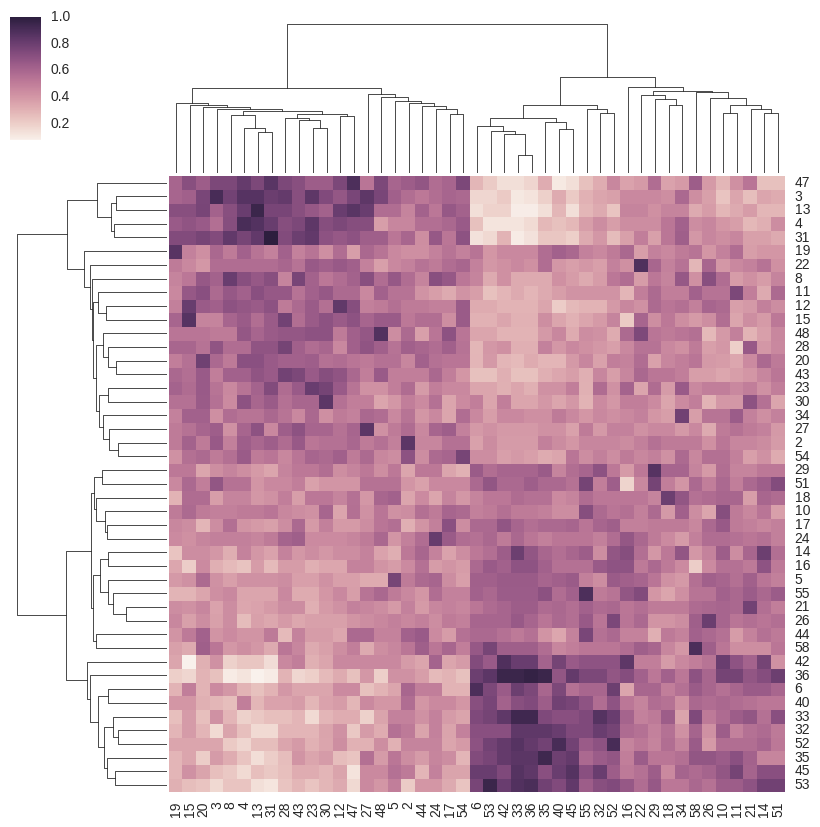

In [27]:
import seaborn as sns; sns.set()

g = sns.clustermap(TreeEnsembleDF)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

In [28]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


# generate the linkage matrix
Z = linkage(TreeEnsembleDF, method='complete')
c, coph_dists = cophenet(Z, pdist(D))
#c
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels=TreeEnsembleDF.index
)

label_colors = sujetdf[['sujet','color2']].set_index('sujet').to_dict()['color2']

ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[int(lbl.get_text())])
    #print(label_colors[int(lbl.get_text())])
#plt.show()

NameError: name 'D' is not defined

In [11]:
from scipy.cluster.hierarchy import fcluster
k=4
TreeEnsembleDF['cl']=fcluster(Z, k, criterion='maxclust')
TreeEnsembleDF.cl.head()

NameError: name 'Z' is not defined

In [10]:
TreeEnsembleDF[TreeEnsembleDF['cl']==2].index.values

NameError: name 'TreeEnsembleDF' is not defined

In [29]:
import pickle

ls= [pd.DataFrame({sujet:pickle.loads(Tree[sujet]).feature_importances_}) for sujet in TreeEnsembleDF[TreeEnsembleDF['cl']==2].index.values]   
df=pd.concat(ls,axis=1) 

KeyError: 'cl'

In [197]:
df

,3,4,8,12,13,15,20,28,31,43,47,48,54
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.239859,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.372549,0.0,0.000000,0.000000
4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
5,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
6,0.000000,0.627451,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
7,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
8,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
9,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000


In [204]:
df.ix[df.sum(axis=1)>0,:]

,3,4,8,12,13,15,20,28,31,43,47,48,54
1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.239859,0.000000,0.0,0.000000,0.0,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.372549,0.0,0.000000,0.000000
5,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
6,0.000000,0.627451,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
10,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.272269,0.0,0.000000,0.0,0.000000,0.000000
16,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.119929,0.000000,0.0,0.000000,0.0,0.000000,0.306668
19,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.257143,0.0,0.000000,0.0,0.000000,0.000000
26,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.172698,0.000000,0.0,0.000000,0.0,0.000000,0.000000
27,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.375000,0.000000
28,0.649351,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000


In [9]:
[{sujet:pickle.loads(Tree[sujet]).tree_} for sujet in TreeEnsembleDF[TreeEnsembleDF['cl']==2].index.values]

NameError: name 'TreeEnsembleDF' is not defined

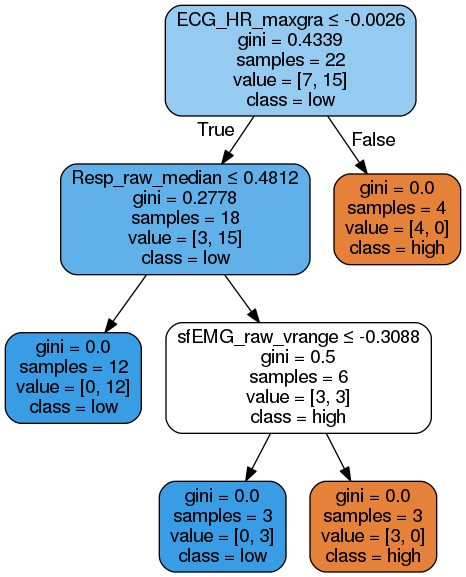

In [34]:
from sklearn.datasets import load_iris
from sklearn import tree

import pydotplus
from IPython.display import Image  

#iris = load_iris()
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(iris.data, iris.target)
dot_data = tree.export_graphviz(pickle.loads(Tree[34]), out_file=None, 
                         feature_names=X[fea_rank.index[:70]].columns.values.astype('str'),  
                         class_names=['high','low'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [222]:
X[fea_rank.index[:70]].columns.values.astype('str')

array(['sfEMG_raw_avgder', 'sfEMG_raw_mean', 'Resp_Ampup_kurtosis',
       'fEMG_raw_maxgra', 'fEMG_raw_mean', 'Resp_raw_skewness',
       'ECG_IBI_avgder', 'Resp_RR_avgder', 'Resp_fre_b4',
       'fEMG_raw_avgder', 'EDA_tonic_skewness', 'fEMG_raw_median',
       'Resp_RR_kurtosis', 'Resp_one_Num', 'Resp_raw_mean',
       'Resp_RR_skewness', 'EDA_tonic_kurtosis', 'Resp_fre_b3',
       'ECG_HR_skewness', 'EDA_one_nbpks', 'ECG_HR_kurtosis',
       'sfEMG_raw_median', 'Resp_Ampup_skewness', 'ECG_HR_avgder',
       'Resp_raw_avgder', 'Resp_RR_min', 'EDA_fre_b2', 'ECG_raw_mean',
       'ECG_IBI_kurtosis', 'EDA_phde_kurtosis', 'ECG_IBI_skewness',
       'Resp_Ampup_avgder', 'Resp_raw_kurtosis', 'Resp_Ampup_min',
       'fEMG_raw_vrange', 'fEMG_raw_min', 'EDA_ph_skewness',
       'EDA_phde_absdev', 'ECG_raw_avgder', 'Resp_Ampup_maxgra',
       'EDA_phde_avgder', 'EDA_phde_median', 'Resp_RR_absdev',
       'ECG_HR_maxgra', 'EDA_phde_skewness', 'ECG_HR_b2', 'sfEMG_raw_min',
       'fEMG_raw_max

In [92]:
from sklearn.cluster import KMeans

random_state=1
y_pred = KMeans(n_clusters=4, random_state=random_state).fit_predict(TreeEnsembleDF)
y_pred
#TreeEnsembleDF['cluster']=y_pred

array([2, 0, 0, 1, 3, 2, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 1, 2, 0, 3, 3, 2, 3, 3, 3, 3, 2, 1, 3, 0, 2, 1, 3, 3, 2, 1, 1], dtype=int32)

In [35]:
cmpsigfeature.fillna(0,inplace=True)

In [36]:
cmpsigfeature.head()

,ECG,EDA,Resp,fEMG,nevent,score_o_mean,score_o_std,score_s_mean,score_s_std,sfEMG
2,6.0,7,6,0.0,47,0.558889,0.213657,0.817778,0.171068,1.0
3,3.0,3,7,4.0,46,0.740000,0.084795,0.911111,0.129577,3.0
4,6.0,4,6,2.0,32,0.880952,0.060234,0.971429,0.057143,2.0
5,6.0,4,6,2.0,43,0.600000,0.268656,0.905556,0.092296,2.0
6,5.0,6,4,3.0,20,0.536667,0.209072,0.900000,0.122474,2.0


In [40]:
dfclu=cmpsigfeature[['ECG','EDA','Resp','fEMG','sfEMG']]/20

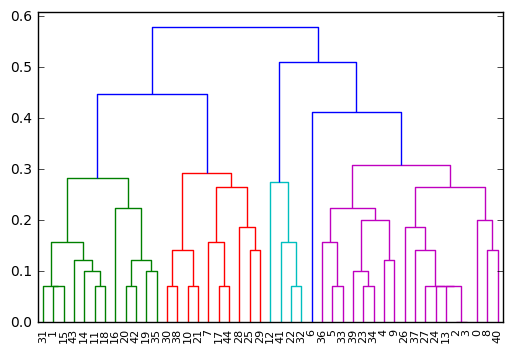

In [44]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


# generate the linkage matrix
Z = linkage(dfclu, method='complete')
c, coph_dists = cophenet(Z, pdist(dfclu))
#c
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [54]:
from scipy.cluster.hierarchy import fcluster
k=4
cluster=fcluster(Z, k, criterion='maxclust')

In [55]:
dfclu['cluster']=cluster

In [74]:
dfclu.columns.values

array([u'ECG', u'EDA', u'Resp', u'fEMG', u'sfEMG', 'cluster'], dtype=object)

cluster1
cluster2
cluster3
cluster4


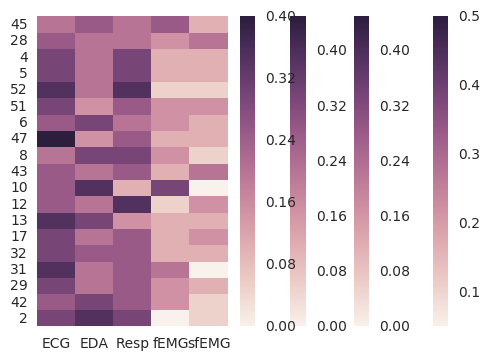

In [69]:
for cl, mat in dfclu.groupby('cluster'):
    print('cluster'+str(cl))
    ax = sns.heatmap(mat.drop('cluster',axis=1))

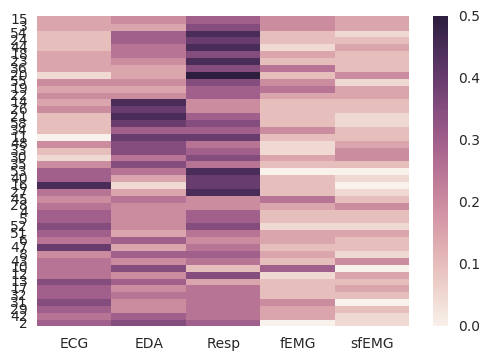

In [66]:
dfclu=dfclu.sort_values(by='cluster')
ax = sns.heatmap(dfclu.drop('cluster',axis=1),row=)

In [78]:
dfclux=dfclu.groupby('cluster')[[u'ECG', u'EDA', u'Resp', u'fEMG', u'sfEMG']].mean()

ValueError: num must be 1 <= num <= 1, not 2

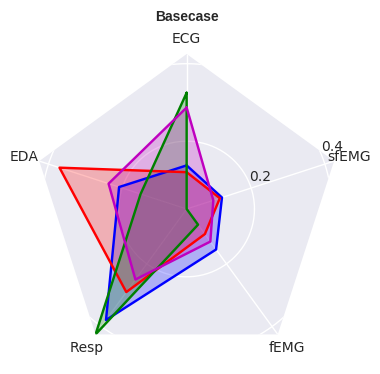

In [110]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    # rotate theta such that the first axis is at the top
    theta += np.pi/2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See  doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolized Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase speciesis present...
    data = [
        [u'ECG', u'EDA', u'Resp', u'fEMG', u'sfEMG'],
        ('Basecase', np.array(dfclux)),
        ('With CO', [
            ]),
        ('With O3', [
            ]),
        ('CO & O3', [
            ])
    ]
    return data


if __name__ == '__main__':
    N = 5
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig = plt.figure(figsize=(4, 4))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm']
    # Plot the four cases from the example data on separate axes
    for n, (title, case_data) in enumerate(data):
        ax = fig.add_subplot(1, 1, n + 1, projection='radar')
        plt.rgrids([0.2, 0.4, 0.6, 0.8])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    #plt.subplot(2, 2, 1)
    #labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
    #legend = plt.legend(labels, loc=(0.9, .95), labelspacing=0.1)
    #plt.setp(legend.get_texts(), fontsize='small')

    plt.figtext(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
                ha='center', color='black', weight='bold', size='large')
    plt.show()